# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a> qui a pour but de mettre à disposition des consommateurs les données des produits alimentaires. Pour une meilleure compréhension des données, une description est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, le service R&D développe un outil permetant de rééquilibrer les habitudes alimentaire. Le but est de restranscrire les repas en informations nutritionnelles afin de proposer des menus plus équilibrés. Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (Régime alimentaire, allergies, ...)
5. Proposition de menus respectants les ANC et les Apports Journaliers recommandés (AJR)

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook d'analyse:**
1. Description des données
2. Analyse des données
   1. *Analyse univariée*
      1. *Top 20 des marques représentées*
      2. *Proportion de produits (huile de palme, allergènes ou additifs)*
      3. *Groupes PNNS-1*
      4. *Groupes PNNS-2*
      5. *Qualité nutritionnelle*
      6. *Les nutriments*
   2. *Analyse bivariée - Corrélations*
      1. *PNNS-1 / Allergènes*
      2. *PNNS-1 / Additifs*
      3. *PNNS-1 / Huile de palme*
      4. *PNNS-1 / Nutriments*
      5. *Nutri-Grade / Allergènes*
      6. *Nutri-Grade / Additifs*
      7. *Nutri-Grade / Huile de palme*
      8. *Nutri-Grade / Nutriments*

3. Imputation des données manquantes (nutriments)
   1. *Moyenne par colonne*
   2. *Moyenne par catégorie*
   3. *KNN-Imputer*

**Notebook d'analyse:**

4. Analyse statistique des données

## **0. Importation des librairies et des données**
---

In [2]:
# import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import scipy.stats as stats
from wordcloud import WordCloud
import random
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pingouin as pg
import scipy.stats as st

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import davies_bouldin_score
#Classes pour le clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [4]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact_final.csv"
df_food = pd.read_csv(food, sep=",", low_memory=False)

##### **Charte graphique**

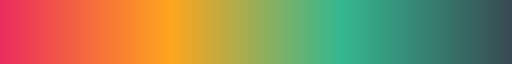

In [5]:
# Define the color
first_color = "#EB2D5F"  # Couleur pour les valeurs inférieures
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 1000
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

In [6]:
# Set palette color for Nutri-Scor
palette_nutri = "#35b890","#78b16a","#ffa51f","#f87d34","#eb2d5f"

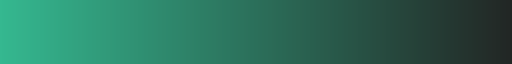

In [7]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [8]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.13977361826350795, 0.18732036978734143, 0.17076034515329036),
 (0.14433057350979375, 0.22308594352214572, 0.1971332681457356),
 (0.14888752875607952, 0.25885151725695, 0.22350619113818082),
 (0.15344448400236532, 0.29461709099175426, 0.24987911413062608),
 (0.15800143924865112, 0.33038266472655853, 0.27625203712307134),
 (0.16255839449493692, 0.3661482384613628, 0.30262496011551654),
 (0.16711534974122272, 0.40191381219616706, 0.3289978831079618),
 (0.1716723049875085, 0.43767938593097133, 0.35537080610040706),
 (0.1762292602337943, 0.4734449596657757, 0.38174372909285226),
 (0.1807862154800801, 0.50921053340058, 0.4081166520852975),
 (0.18534317072636586, 0.5449761071353842, 0.4344895750777428),
 (0.18990012597265166, 0.5807416808701885, 0.46086249807018803),
 (0.19445708121893746, 0.6165072546049928, 0.48723542106263323),
 (0.19901403646522325, 0.652272828339797, 0.5136083440550785),
 (0.20357099171150905, 0.6880384020746013, 0.5399812670475237),
 (0.20784313725490197, 0.7215686274509804, 0.5647058823529412)]

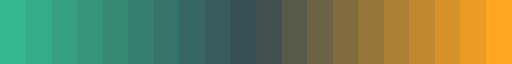

In [9]:
# Define the heatmap color
first_color = "#35B890"  # Couleur pour les valeurs inférieures
under_color = '#384B52'  # Couleur pour les valeurs inférieures
over_color = '#ffa51f'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, over_color]
n_bins = 20
cmap_name = 'custom_colormap'
heatmap_color = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
heatmap_color

## **1. Description des données**
***

In [10]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         42451 non-null  int64  
 1   product_name                 42451 non-null  object 
 2   brands                       42362 non-null  object 
 3   allergens                    42451 non-null  int64  
 4   additives_fr                 42451 non-null  int64  
 5   ingredients_from_palm_oil_n  42451 non-null  int64  
 6   nutrition_grade_fr           42451 non-null  object 
 7   pnns_groups_1                42451 non-null  object 
 8   pnns_groups_2                42451 non-null  object 
 9   energy_100g                  42451 non-null  float64
 10  fat_100g                     42451 non-null  float64
 11  saturated-fat_100g           42451 non-null  float64
 12  carbohydrates_100g           42451 non-null  float64
 13  sugars_100g     

In [11]:
# View random data
df_food.sample(10)

,code,product_name,brands,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
23568,3350033193635,Tarte Épinard Chèvre,Monoprix,1,1,0,D,Composite foods,Pizza pies and quiche,994.0,13.8,9.480,22.4,2.07,1.540,6.03,0.862000
21594,3292070003594,Mezze Méditerrannéen,Blini,0,1,0,D,Fat and sauces,Dressings and sauces,1523.0,31.5,5.500,6.7,1.30,1.020,6.40,1.100000
40386,8023678162315,Riznoisette,isola Bio,0,0,0,E,Beverages,Non-sugared beverages,333.0,2.7,0.400,12.5,5.50,0.900,0.80,0.080000
37697,5413415233300,Chocolat Noir Poivre Rose,Dolfin,1,1,0,E,Sugary snacks,Chocolate products,2230.0,35.0,21.000,43.0,38.00,10.000,7.00,0.030480
17111,3262971311258,Lait fermenté,--,0,0,0,A,Milk and dairy products,Milk and yogurt,180.0,1.1,0.800,4.9,4.90,0.320,3.40,0.120000
34857,3760132081991,Concombre Avocat Poire,"Green Smoothie,Green Shoot",0,0,0,D,Beverages,Non-sugared beverages,139.0,0.9,0.100,4.9,4.40,3.660,0.50,0.030000
17675,3263851740717,Gratin Dauphinois,Leader Price,1,1,0,B,Composite foods,One-dish meals,275.0,1.9,1.300,9.8,0.70,1.800,1.40,0.750000
12354,3250390682882,Lait écrémé en poudre,Netto,0,0,0,D,Beverages,Non-sugared beverages,1526.0,0.8,0.500,52.0,52.00,0.000,36.00,1.100000
21225,3280222511080,Florette - Mélange de printemps,florette,0,0,0,A,Fruits and vegetables,Vegetables,75.1,0.3,0.054,1.2,0.69,2.072,1.50,0.958617
31328,3596710274543,Poêlée fermière,Auchan,1,0,0,A,Fruits and vegetables,Vegetables,364.0,4.1,0.900,9.6,1.70,2.500,1.70,0.550000


In [12]:
df_food.describe()

,code,allergens,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,4.245100e+04,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000
mean,3.775148e+12,0.431132,0.553038,0.065864,1087.472008,12.876263,5.278374,26.445658,12.703341,2.151700,7.639253,0.871013
std,5.492637e+12,0.495240,0.497185,0.248047,784.884122,15.906073,8.192930,26.885078,18.125360,3.132022,7.350439,1.501441
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000
25%,3.228881e+12,0.000000,0.000000,0.000000,393.000000,1.000000,0.220000,3.900000,1.000000,0.340000,1.500000,0.070000
50%,3.276556e+12,0.000000,1.000000,0.000000,996.000000,6.200000,1.800000,13.000000,4.000000,1.280000,6.000000,0.568960
75%,3.596710e+12,1.000000,1.000000,0.000000,1633.000000,21.000000,7.200000,52.000000,15.900000,2.900000,11.000000,1.200000
max,3.661112e+14,1.000000,1.000000,1.000000,3772.000000,99.900000,95.000000,99.900000,99.900000,86.200000,86.000000,76.200000


## **2. Analyse de données**
***

### **1. Analyses univariées**

##### **1. Top 20 des marques représentées**

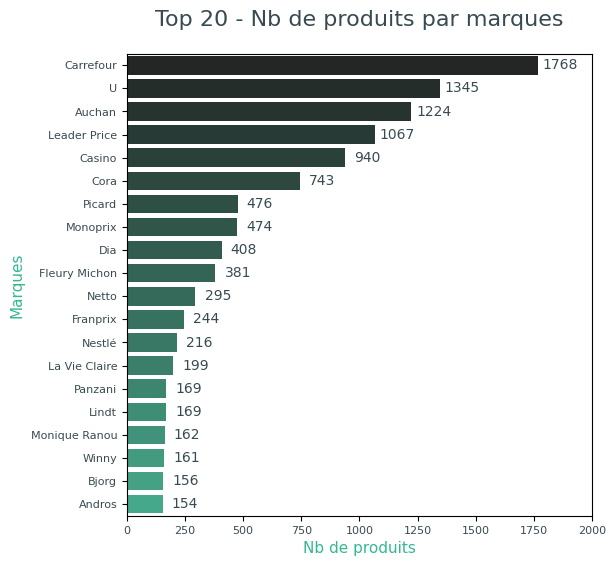

In [13]:
df_food_marques = df_food[["product_name","brands"]].groupby(by=["brands"]).count().sort_values(by="product_name", ascending=False).head(20).reset_index()

# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(df_food_marques),as_cmap=False)

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df_food_marques,x="product_name",y="brands",palette=random_colors)
plt.title("Top 20 - Nb de produits par marques",pad=20,color="#384B52",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#384B52")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de produits",color='#35B890', fontsize=11)
plt.ylabel("Marques",color='#35B890', fontsize=11)
plt.show()

##### **2. Proportion de produits (huile de palme, allergènes ou additifs)**

In [14]:
#Select product with palm oil
df_produit_palme = df_food.loc[df_food["ingredients_from_palm_oil_n"] == 1]
#Select product with allergen
df_produit_allergens = df_food.loc[df_food["allergens"] == 1]
#Select product with allergen
df_produit_additives = df_food.loc[df_food["additives_fr"] == 1]

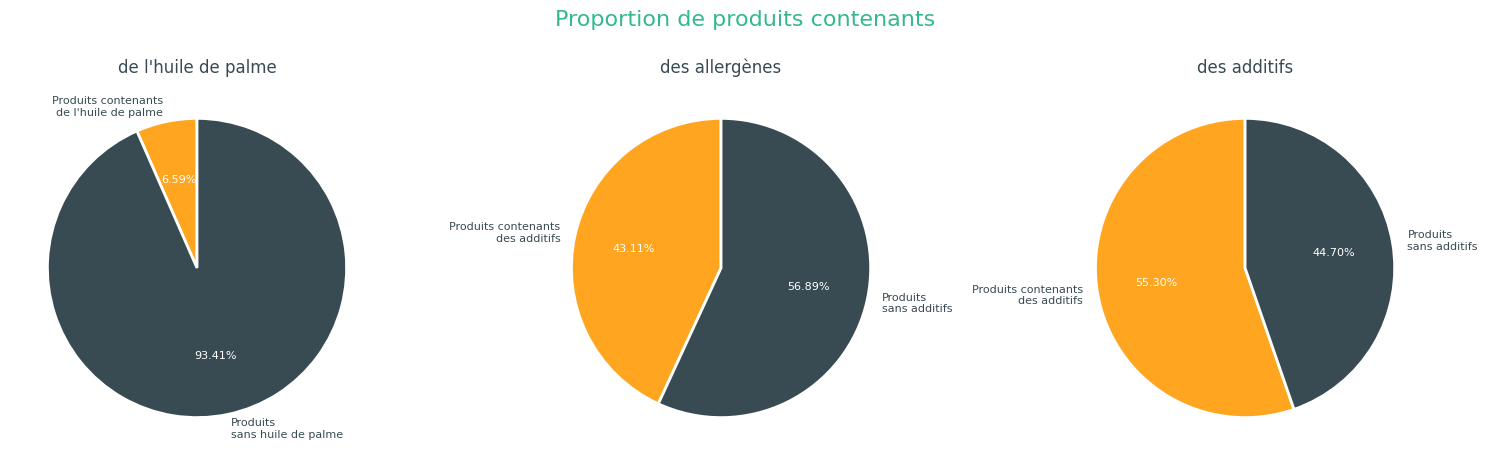

In [15]:
# Calculation of the average percentage of missing values
percent_with_palm_oil = (len(df_produit_palme)*100)/len(df_food)
# Calculation of the proportion of non-missing values
non_percent_with_palm_oil = 100 - percent_with_palm_oil
# Data for pie chart
data_palm_oil = [percent_with_palm_oil, non_percent_with_palm_oil]
labels_palm_oil = ["Produits contenants\nde l'huile de palme", "Produits\nsans huile de palme"]

# Calculation of the average percentage of missing values
percent_with_allergens = (len(df_produit_allergens)*100)/len(df_food)
# Calculation of the proportion of non-missing values
non_percent_with_allergens = 100 - percent_with_allergens
# Data for pie chart
data_allergens = [percent_with_allergens, non_percent_with_allergens]
labels_allergens = ["Produits contenants\ndes allergènes", "Produits\nsans allergènes"]

# Calculation of the average percentage of missing values
percent_with_additives = (len(df_produit_additives)*100)/len(df_food)
# Calculation of the proportion of non-missing values
non_percent_with_additives = 100 - percent_with_additives
# Data for pie chart
data_additives = [percent_with_additives, non_percent_with_additives]
labels_allergens = ["Produits contenants\ndes additifs", "Produits\nsans additifs"]

# Define color code
colors = ["#ffa51f",'#384B52']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create pie chart for raw dataset
patches1, texts1, autotexts1 = axes[0].pie(
    data_palm_oil, labels=labels_palm_oil,
    startangle=90, colors=colors, autopct="%1.2f%%",
    wedgeprops={"linewidth": 2, "edgecolor": "white"})
# Set title on pie chart
axes[0].set_title("de l'huile de palme", color="#384B52", fontsize=12)
# Customise label colours and sizes
plt.setp(texts1 + autotexts1, color="#384B52", fontsize=8)
plt.setp(autotexts1, color="white")

# Create pie chart for deleting unusable data
patches2, texts2, autotexts2 = axes[1].pie(
    data_allergens, labels=labels_allergens,
    startangle=90, colors=colors, autopct="%1.2f%%",
    wedgeprops={"linewidth": 2, "edgecolor": "white"})
# Customise label colours and sizes
plt.setp(texts2 + autotexts2, color="#384B52", fontsize=8)
plt.setp(autotexts2, color="white")
# Set title on pie chart
axes[1].set_title("des allergènes", color="#384B52", fontsize=12)

# Create pie chart for deleting unusable data
patches3, texts3, autotexts3 = axes[2].pie(
    data_additives, labels=labels_allergens,
    startangle=90, colors=colors, autopct="%1.2f%%",
    wedgeprops={"linewidth": 2, "edgecolor": "white"})
# Customise label colours and sizes
plt.setp(texts3 + autotexts3, color="#384B52", fontsize=8)
plt.setp(autotexts3, color="white")
# Set title on pie chart
axes[2].set_title("des additifs", color="#384B52", fontsize=12)

# Set the global title
plt.suptitle("Proportion de produits contenants",fontsize=16, color="#35B890")
# Adjust spacing between subplots
plt.tight_layout()
# Show the plots
plt.show()

##### **3. Groupes PNNS-1**

In [16]:
#Number of products per category
df_produit_categ1 = df_food[['pnns_groups_1', 'code']].groupby(by='pnns_groups_1').count().reset_index().sort_values(by="code", ascending=False)

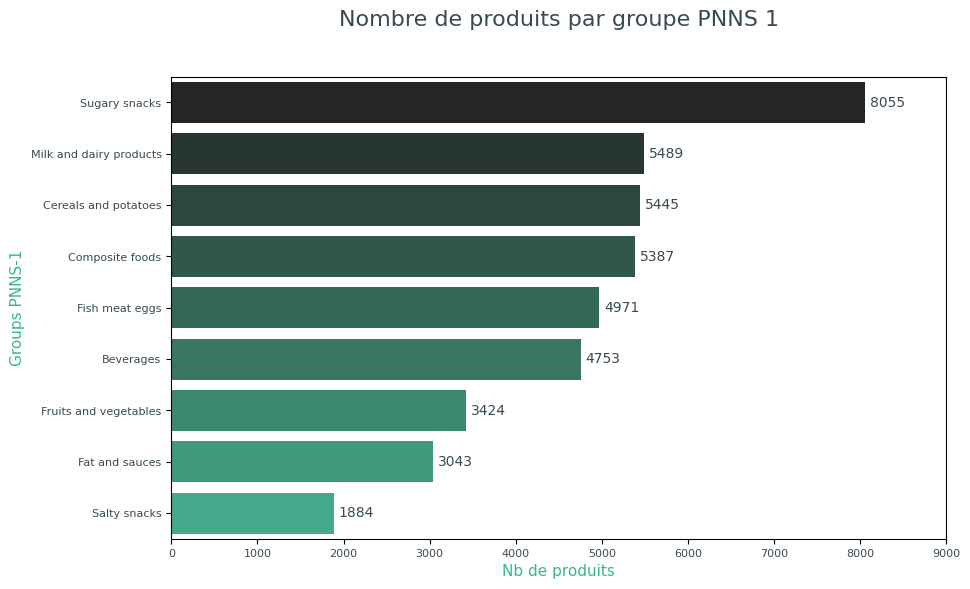

In [17]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_produit_categ1),as_cmap=False)

# Create the bar plot with transposed axes
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_produit_categ1, x='code', y='pnns_groups_1', palette=palette_map)
# Set the title and labels
ax.set_title("Nombre de produits par groupe PNNS 1\n",pad=20,color="#384B52",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#384B52")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de produits",color='#35B890', fontsize=11)
plt.ylabel("Groups PNNS-1",color='#35B890', fontsize=11)

# Show the plot
plt.show()

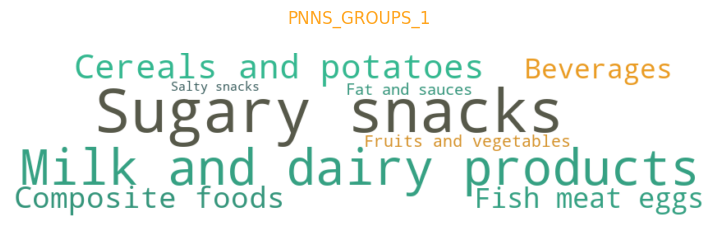

In [18]:
# Create a dictionary where keys are categories and values are their counts
category_dict1 = df_food["pnns_groups_1"].value_counts().to_dict()
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(category_dict1),as_cmap=True)

# Create a WordCloud object using the category counts as frequencies
wordcloud = WordCloud(width=850, height=200, background_color='white', colormap=heatmap_color).generate_from_frequencies(category_dict1)
# Display the WordCloud using Matplotlib
plt.figure(figsize=(9, 8))
plt.imshow(wordcloud, interpolation='bilinear')
# Add a title to the plot
plt.title("PNNS_GROUPS_1\n", color="#ffa51f")
plt.axis('off')
plt.show()

##### **4. Groupes PNNS-2**

In [19]:
#Number of products per category
df_produit_categ2 = df_food[['pnns_groups_2', 'code']].groupby(by='pnns_groups_2').count().reset_index().sort_values(by="code", ascending=False)

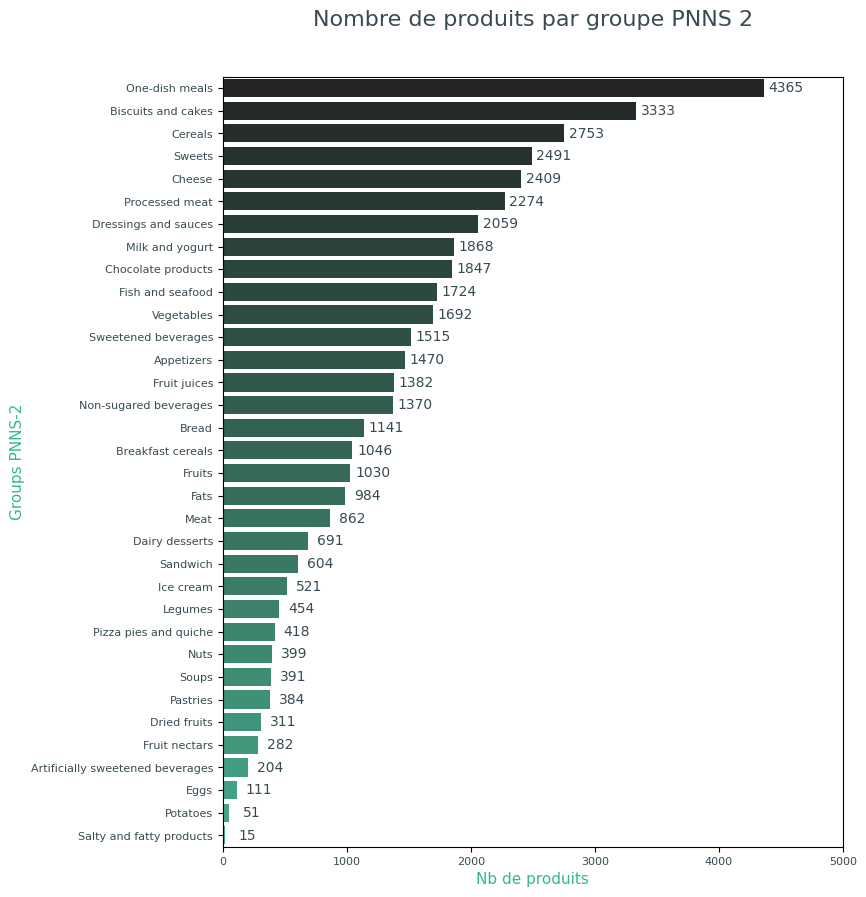

In [20]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_produit_categ2),as_cmap=False)

# Create the bar plot with transposed axes
plt.figure(figsize=(8,10))

ax = sns.barplot(data=df_produit_categ2, x='code', y='pnns_groups_2', palette=palette_map)
# Set the title and labels
ax.set_title("Nombre de produits par groupe PNNS 2\n",pad=20,color="#384B52",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#384B52")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de produits",color='#35B890', fontsize=11)
plt.ylabel("Groups PNNS-2",color='#35B890', fontsize=11)

# Show the plot
plt.show()

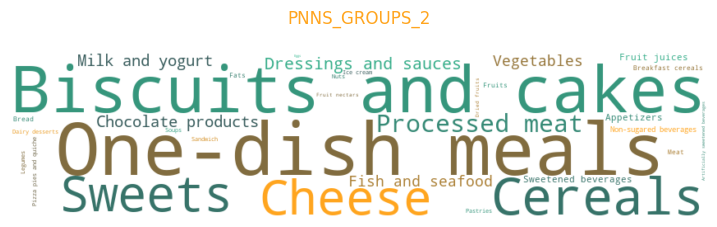

In [21]:
# Create a dictionary where keys are categories and values are their counts
category_dict2 = df_food["pnns_groups_2"].value_counts().to_dict()
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(category_dict2),as_cmap=True)

# Create a WordCloud object using the category counts as frequencies
wordcloud = WordCloud(width=850, height=200, background_color='white', colormap=heatmap_color).generate_from_frequencies(category_dict2)
# Display the WordCloud using Matplotlib
plt.figure(figsize=(9, 8))
plt.imshow(wordcloud, interpolation='bilinear')
# Add a title to the plot
plt.title("PNNS_GROUPS_2\n", color="#ffa51f")
plt.axis('off')
plt.show()

##### **5. Qualité nutritionnelle**

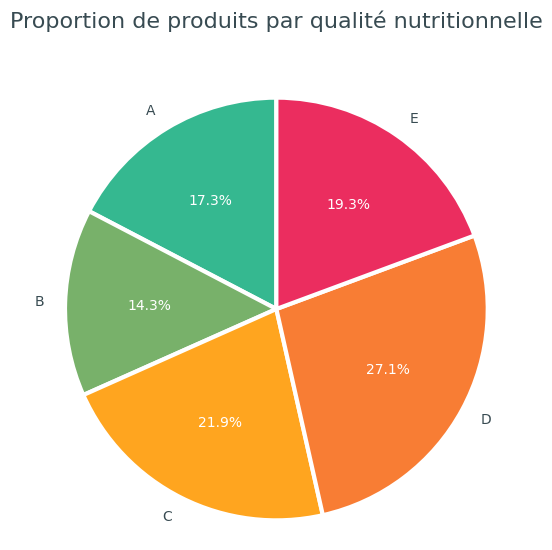

In [22]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = df_food["nutrition_grade_fr"].value_counts().sort_index()
labels = sorted(df_food["nutrition_grade_fr"].unique().tolist())

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=palette_nutri, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits par qualité nutritionnelle\n",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

##### **6. Les nutriments**

In [23]:
# Rename column energy
df_food = df_food.rename(columns={"energy_100g":"energy_100g (kJ)"})

In [24]:
# Instantiation of nutrient columns
col_nutri = df_food.columns[df_food.columns.str.contains("_100")]

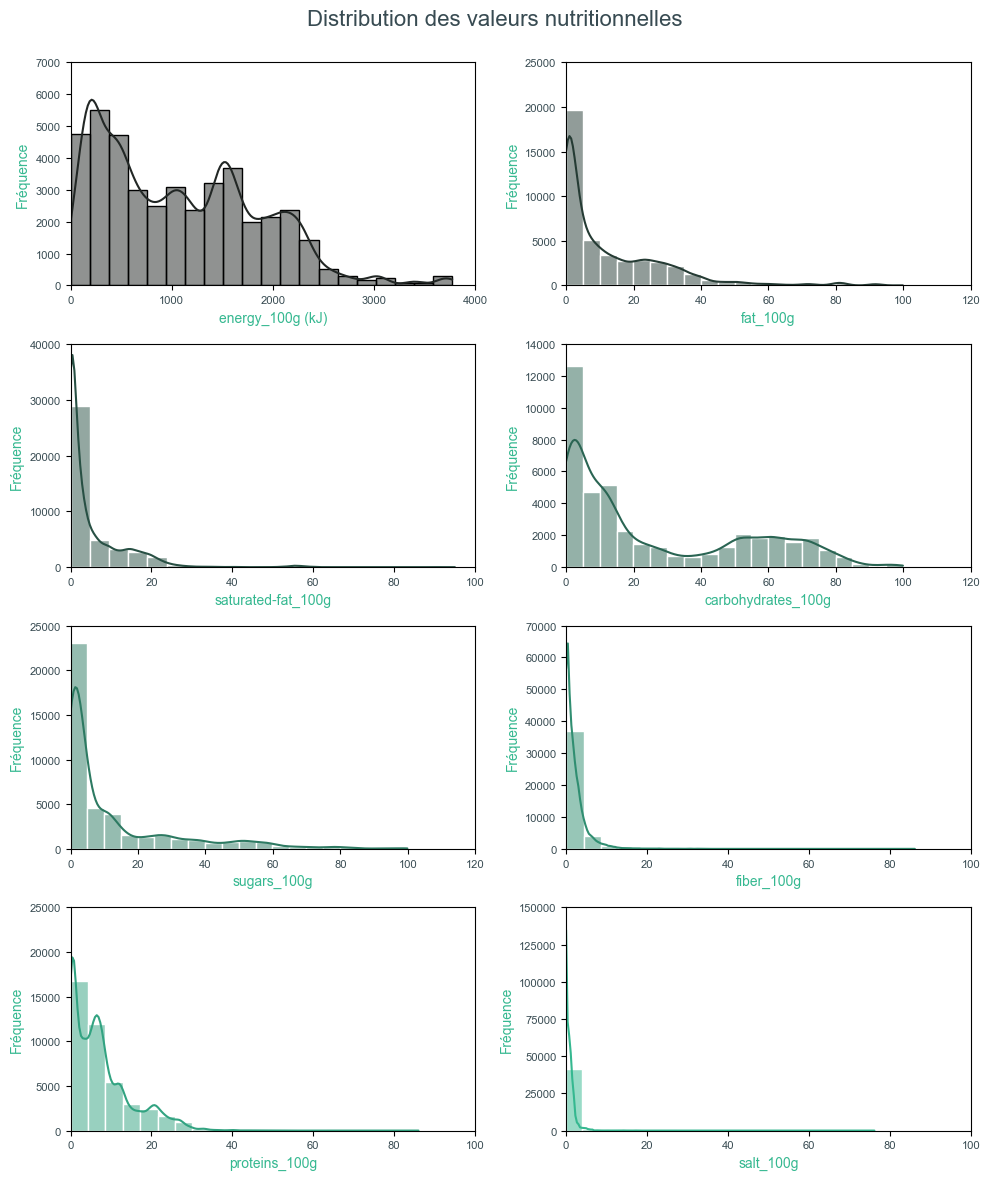

In [25]:
# Set up the figure and axes using Matplotlib
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
# Titre global
fig.suptitle("Distribution des valeurs nutritionnelles\n", fontsize=16, color="#384B52")
# Flatten the axes array for easier iteration
axes = axes.flatten()
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(df_food[col_nutri].columns), as_cmap=False)
# Iterate through each column
for i, col in enumerate(df_food[col_nutri].columns):
    ax = axes[i]  # Select the current subplot
    
    sns.histplot(data=df_food, x=col, bins=20, ax=ax, kde=True, color=random_colors[i])
    ax.set_xlabel(col, color='#35B890', fontsize=10)
    ax.set_ylabel("Fréquence", color='#35B890', fontsize=10)
    # Specifies the location of axis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
    ax.set_xlim(0,)  # Remplacez valeur_max par la valeur maximale dans votre ensemble de données

    sns.set_style('whitegrid')  # Set seaborn style
    # Specifies the location of x-axis labels
    
plt.tight_layout()  # Adjust subplot layout
plt.show()

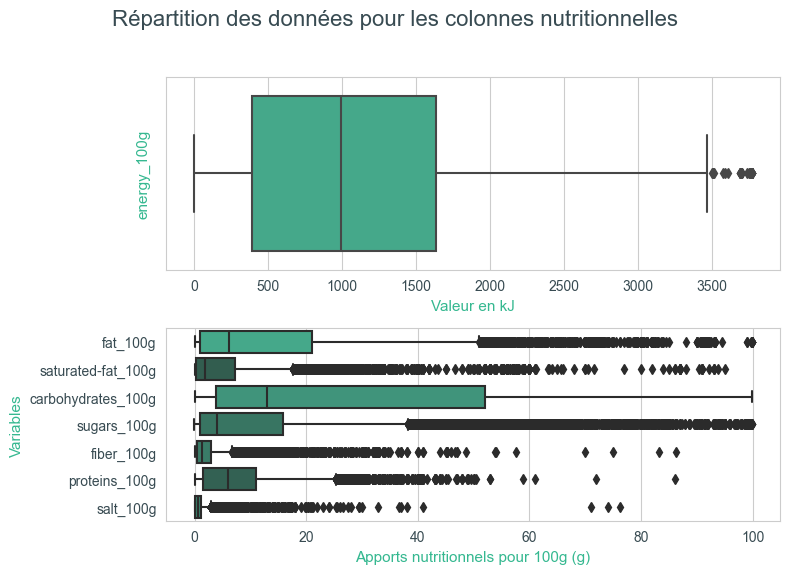

In [26]:
# Create a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Add a global title above the subplots
fig.suptitle("Répartition des données pour les colonnes nutritionnelles", fontsize=16, color="#384B52")

# Plot the first boxplot
sns.boxplot(data=df_food, x="energy_100g (kJ)", ax=axes[0], color="#35B890")
axes[0].set_xlabel("Valeur en kJ", color='#35B890', fontsize=11)
axes[0].set_ylabel("energy_100g", color='#35B890', fontsize=11)
axes[0].tick_params(axis='both', colors='#384B52')

# Select 5 random colors from your palette
random_colors = random.sample(palette_map, len(col_nutri))

# Plot the third boxplot
sns.boxplot(data=df_food[col_nutri].drop(["energy_100g (kJ)"], axis=1), ax=axes[1], palette=random_colors, orient="h")
axes[1].set_xlabel("Apports nutritionnels pour 100g (g)", color='#35B890', fontsize=11)
axes[1].set_ylabel("Variables", color='#35B890', fontsize=11)
axes[1].tick_params(axis='both', colors='#384B52')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle

# Display the plot
plt.show()

### **2. Analyse bivariée - Corrélations**

##### **1. PNNS-1 / Allergènes**

In [27]:
# Number of products containing allergens by group_pnns
correlation_allergen_pnns = df_food[["pnns_groups_1","allergens"]].pivot_table(index='pnns_groups_1',columns='allergens',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\1643018157.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D08D195950> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


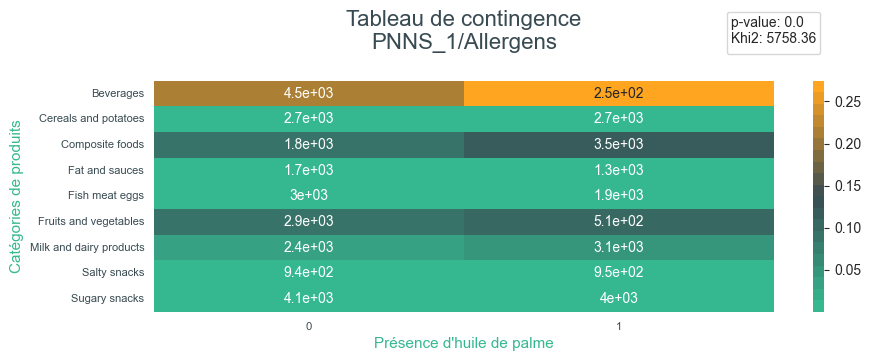

In [28]:
tx = correlation_allergen_pnns.loc[:,["Total"]]
ty = correlation_allergen_pnns.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_allergen_pnns.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_allergen_pnns)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nPNNS_1/Allergens\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'huile de palme', fontsize=11, color="#35B890")
plt.ylabel("Catégories de produits", fontsize=11, color='#35B890')
plt.show()

Hypothèse nul, les variables sont indépendantes. La P-Value est trops faible, nous rejetons l'hypothèse.

##### **2. PNNS-1 / Additifs**

In [29]:
# Number of products containing allergens by group_pnns
correlation_additifs_pnns = df_food[["pnns_groups_1","additives_fr"]].pivot_table(index='pnns_groups_1',columns='additives_fr',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\3670783210.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D08A2B09D0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


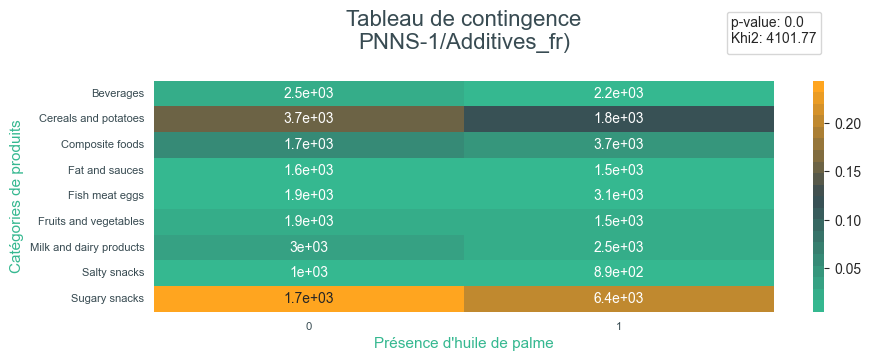

In [30]:
tx = correlation_additifs_pnns.loc[:,["Total"]]
ty = correlation_additifs_pnns.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_additifs_pnns.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_additifs_pnns)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nPNNS-1/Additives_fr)\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'huile de palme', fontsize=11, color="#35B890")
plt.ylabel("Catégories de produits", fontsize=11, color='#35B890')
plt.show()

Hypothèse nul, les variables sont indépendantes. La P-Value est trops faible, nous rejetons l'hypothèse.

##### **3. PNNS-1 / Huile de palme**

In [31]:
#Nombre de produits contenant de l'huile de palm en fonction des groups_pnns
correlation_palmoil_pnns = df_food[["pnns_groups_1","ingredients_from_palm_oil_n"]].pivot_table(index='pnns_groups_1',columns='ingredients_from_palm_oil_n',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\1853345746.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D08A31E210> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


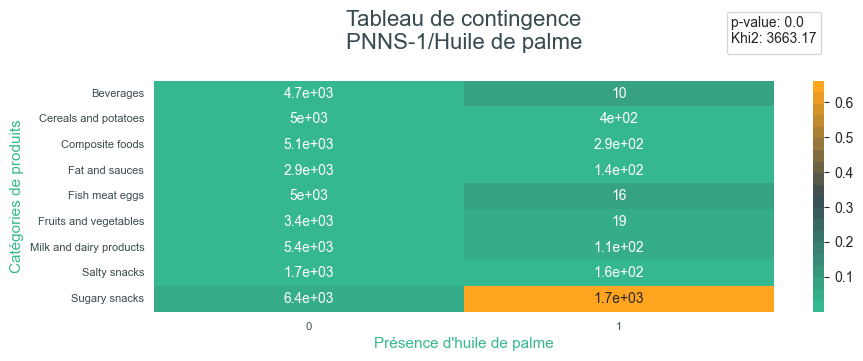

In [32]:
tx = correlation_palmoil_pnns.loc[:,["Total"]]
ty = correlation_palmoil_pnns.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_palmoil_pnns.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_palmoil_pnns)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nPNNS-1/Huile de palme\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'huile de palme', fontsize=11, color="#35B890")
plt.ylabel("Catégories de produits", fontsize=11, color='#35B890')
plt.show()

Hypothèse nul, les variables sont indépendantes. La P-Value est trops faible, nous rejetons l'hypothèse.


##### **4. PNNS-1 / Nutriments**

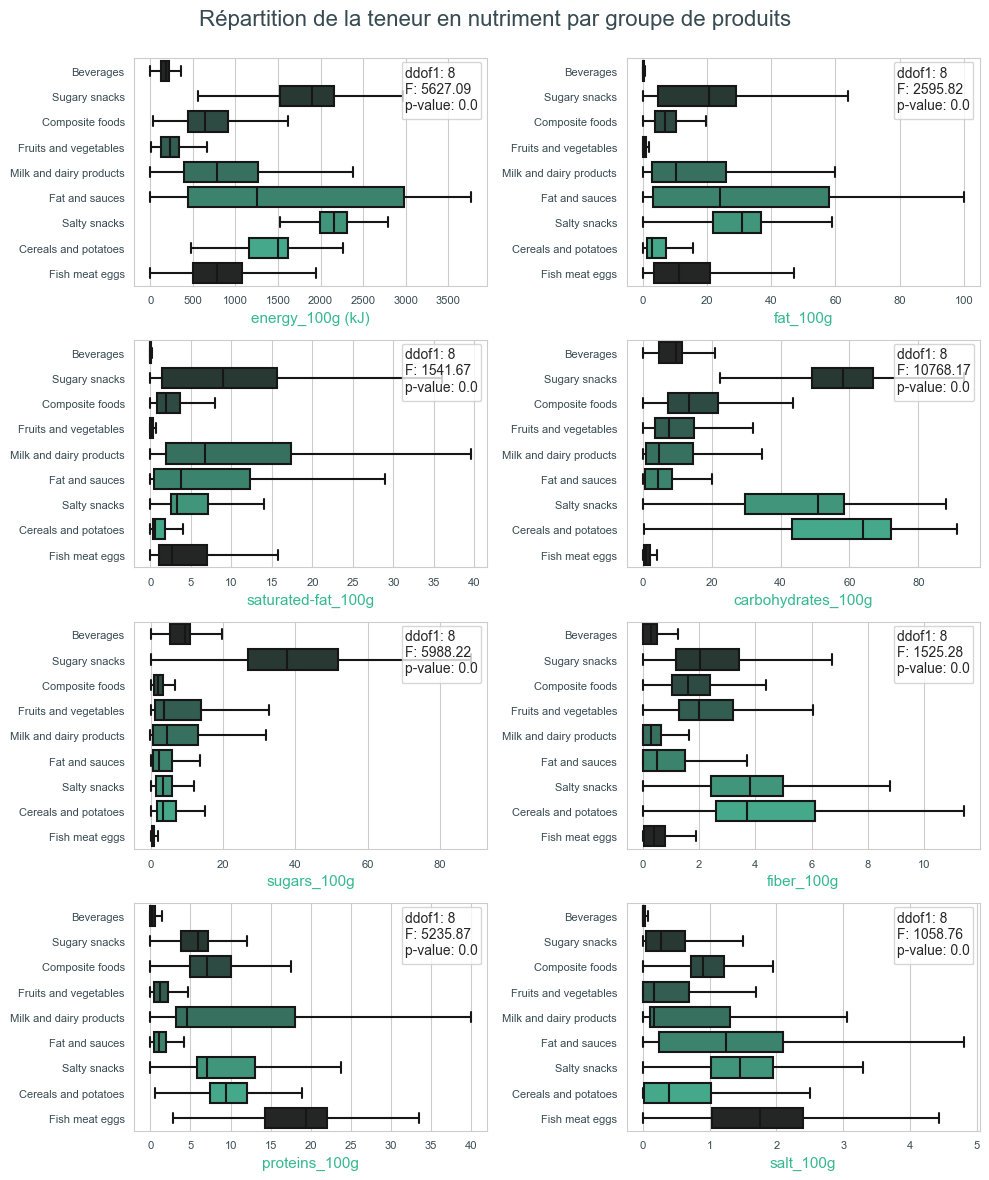

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed (based on the number of columns)
num_rows = (len(col_nutri) + 1) // 2

# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(df_food[col_nutri].columns), as_cmap=False)

# Set the figure size and create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3*num_rows))
plt.suptitle('Répartition de la teneur en nutriment par groupe de produits\n', fontsize=16, color='#384B52')

# Iterate over each column
for i, column in enumerate(col_nutri):
    # Calculate the row and column index for the current subplot
    row = i // 2
    col = i % 2
    # Select the current subplot
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Create the boxplot
    box = sns.boxplot(data=df_food, x=column, y='pnns_groups_1', palette=random_colors, showfliers=False, ax=ax)

    anov = df_food.anova(dv=column, between='pnns_groups_1', detailed=False, effsize='n2')
    ddof1_value = anov.loc[0, "ddof1"]
    F_value = round(anov.loc[0, "F"],2)
    pvalue = anov.loc[0, "p-unc"]

    # Create a legend
    legend_labels = [t.get_text() for t in box.get_xticklabels()]
    legend_title = "ddof1: {}\nF: {}\np-value: {}".format(ddof1_value, F_value, pvalue)
    legend = ax.legend(handles=box.collections, title=legend_title, fontsize="xx-small", loc='upper center', bbox_to_anchor=(0.87, 1))

    ax.set_xlabel(column, color='#35B890', fontsize=11)
    ax.set_ylabel('')
    # Set the color of the tick labels
    ax.tick_params(colors='#384B52', labelsize=8)

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

##### **5. Nutri-Grade / Allergènes**

In [34]:
# Number of products containing allergens by group_pnns
correlation_allergen_nutrigrade = df_food[["nutrition_grade_fr","allergens"]].pivot_table(index='nutrition_grade_fr',columns='allergens',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\3718680418.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D08A05E210> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(round(pval,2), round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


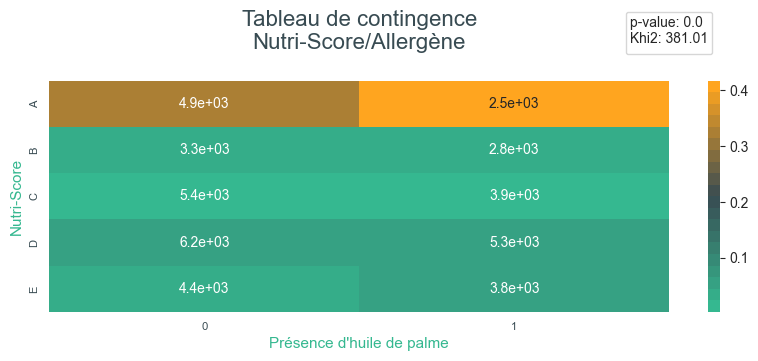

In [35]:
tx = correlation_allergen_nutrigrade.loc[:,["Total"]]
ty = correlation_allergen_nutrigrade.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_allergen_nutrigrade.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_allergen_nutrigrade)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nNutri-Score/Allergène\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(round(pval,2), round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'huile de palme', fontsize=11, color="#35B890")
plt.ylabel("Nutri-Score", fontsize=11, color='#35B890')
plt.show()

##### **6. Nutri-Grade / Additifs**

In [36]:
# Number of products containing allergens by group_pnns
correlation_additifs_nutrigrade = df_food[["nutrition_grade_fr","additives_fr"]].pivot_table(index='nutrition_grade_fr',columns='additives_fr',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\4249476566.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D08A0766D0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(round(pval,2), round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


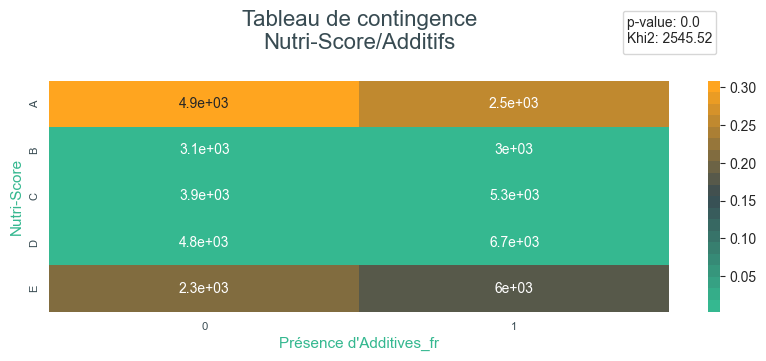

In [37]:
tx = correlation_additifs_nutrigrade.loc[:,["Total"]]
ty = correlation_additifs_nutrigrade.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_additifs_nutrigrade.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_additifs_nutrigrade)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nNutri-Score/Additifs\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(round(pval,2), round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'Additives_fr', fontsize=11, color="#35B890")
plt.ylabel("Nutri-Score", fontsize=11, color='#35B890')
plt.show()

##### **7. Nutri-Grade / Huile de palme**

In [38]:
#Nombre de produits contenant de l'huile de palm en fonction des groups_pnns
correlation_palmoil_nutrigrade = df_food[["nutrition_grade_fr","ingredients_from_palm_oil_n"]].pivot_table(index='nutrition_grade_fr',columns='ingredients_from_palm_oil_n',aggfunc=len,margins=True,margins_name="Total")

C:\Users\remid\AppData\Local\Temp\ipykernel_11800\237314210.py:20: UserWarning: The label '_child0' of <matplotlib.collections.QuadMesh object at 0x000001D089E9E210> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))


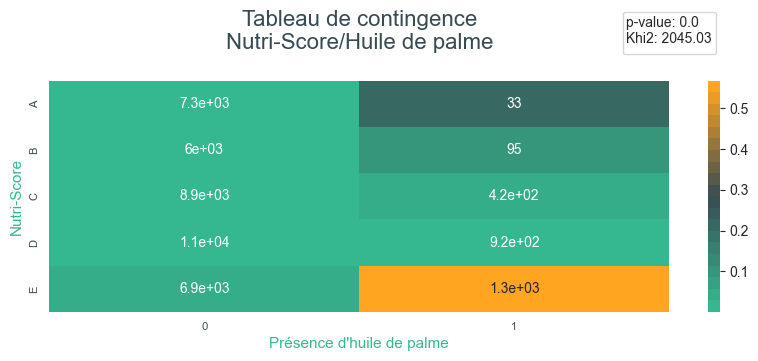

In [39]:
tx = correlation_palmoil_nutrigrade.loc[:,["Total"]]
ty = correlation_palmoil_nutrigrade.loc[["Total"],:]
n = len(df_food)
indep = tx.dot(ty) / n

c = correlation_palmoil_nutrigrade.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
# Statistical test
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(correlation_palmoil_nutrigrade)

plt.figure(figsize=(10,3))
heatmap = sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1], cmap=heatmap_color)
plt.title("Tableau de contingence\nNutri-Score/Huile de palme\n", fontsize=16, color='#384B52')
ax = plt.gca()

# Create a legend
legend_labels = [t.get_text() for t in heatmap.get_xticklabels()]
ax.legend(handles=heatmap.collections, title="p-value: {}\nKhi2: {}".format(pval, round(khi2, 2)), fontsize='x-small', loc='upper center', bbox_to_anchor=(1, 1.32))

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.xlabel('Présence d\'huile de palme', fontsize=11, color="#35B890")
plt.ylabel("Nutri-Score", fontsize=11, color='#35B890')
plt.show()

##### **8. Nutri-Grade / Nutrimentse**

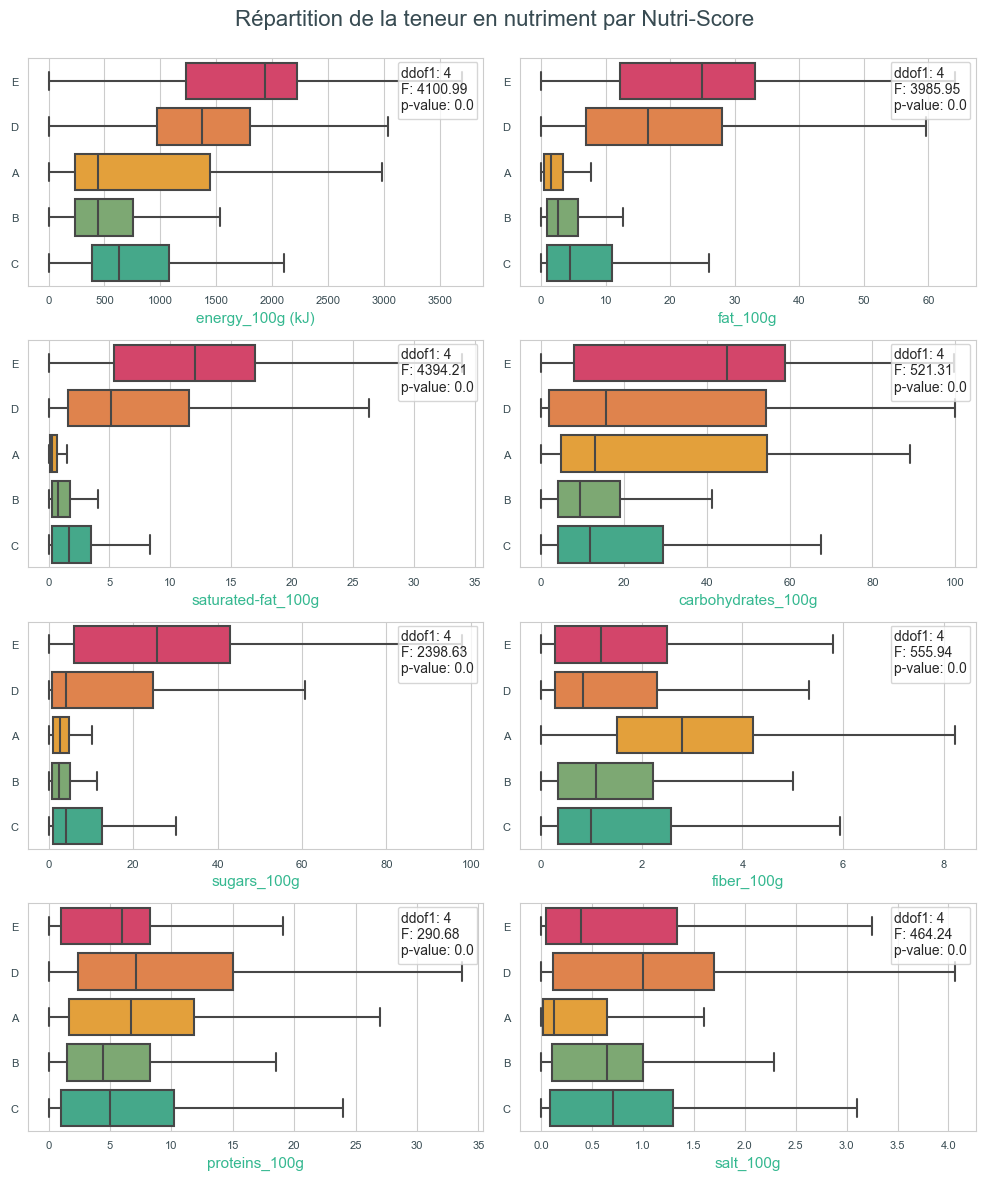

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed (based on the number of columns)
num_rows = (len(col_nutri) + 1) // 2

# Set the figure size and create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3*num_rows))
plt.suptitle('Répartition de la teneur en nutriment par Nutri-Score\n', fontsize=16, color='#384B52')

# Iterate over each column
for i, column in enumerate(col_nutri):
    # Calculate the row and column index for the current subplot
    row = i // 2
    col = i % 2
    # Select the current subplot
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Create the boxplot
    box = sns.boxplot(data=df_food, x=column, y='nutrition_grade_fr', palette=reversed(palette_nutri), showfliers=False, ax=ax)

    anov = df_food.anova(dv=column, between='nutrition_grade_fr', detailed=False, effsize='n2')
    ddof1_value = round(anov.loc[0, "ddof1"],2)
    F_value = round(anov.loc[0, "F"],2)
    pvalue = round(anov.loc[0, "p-unc"],2)

    # Create a legend
    legend_labels = [t.get_text() for t in box.get_xticklabels()]
    legend_title = "ddof1: {}\nF: {}\np-value: {}".format((ddof1_value), F_value, pvalue)
    legend = ax.legend(handles=box.collections, title=legend_title, fontsize="xx-small", loc='upper center', bbox_to_anchor=(0.9, 1))

    ax.set_xlabel(column, color='#35B890', fontsize=11)
    ax.set_ylabel('')
    # Set the color of the tick labels
    ax.tick_params(colors='#384B52', labelsize=8)

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

# Corrélation

In [41]:
# Select columns containing "100g" or "pnns_groups_1"
#df_pairplot = df_food.loc[:, df_food.columns.str.contains("100g") | (df_food.columns == "pnns_groups_1")]

In [42]:
# Instantiation of nutritional columns
col_nutri = df_food.loc[:, df_food.columns.str.contains("100g")]

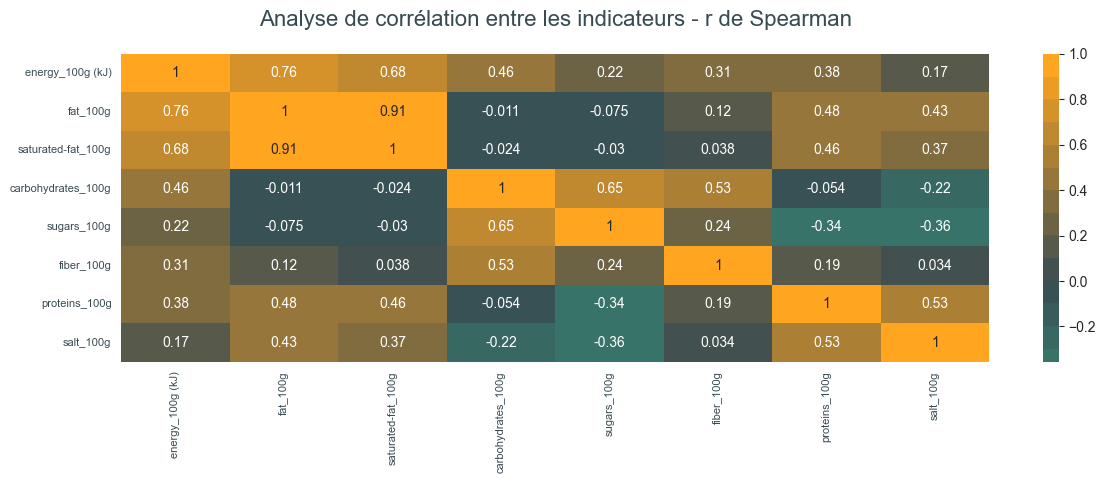

In [43]:
#Analysis of correlations between variables
plt.figure(figsize=(14,4))
ax = sns.heatmap(col_nutri.corr(method="spearman"), center=0, cmap=heatmap_color, annot=True)
ax.set_title('Analyse de corrélation entre les indicateurs - r de Spearman',pad=20,color="#384B52",fontsize=16)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.show()

Le coefficient de Spearman et le coefficient de Pearson sont deux mesures de corrélation en statistiques utilisées pour quantifier la relation entre deux variables. Cependant, ils diffèrent dans leur sensibilité aux types de relations et dans la manière dont ils sont calculés :

Coefficient de Pearson (corrélation linéaire) :

Le coefficient de Pearson, souvent noté sous le symbole "r" ou "r de Pearson", mesure la force et la direction d'une relation linéaire entre deux variables continue.

Il est basé sur la covariance entre les deux variables et la multiplication de leurs écarts-types. La formule est la suivante :

Coefficient de Pearson

Il varie de -1 à 1, où -1 indique une corrélation parfaite négative (les variables évoluent dans des directions opposées), 1 indique une corrélation positive parfaite (les variables évoluent dans la même direction), et 0 indique l'absence de corrélation linéaire.

Coefficient de Spearman (corrélation de rang) :

Le coefficient de Spearman, souvent noté sous le symbole "ρ" (rho) ou "r de Spearman", mesure la force et la direction d'une relation monotone entre deux variables, qu'elle soit linéaire ou non.
Il est basé sur les rangs des valeurs des variables plutôt que sur leurs valeurs brutes. Il convertit les valeurs en rangs, puis calcule le coefficient de corrélation de Pearson pour les rangs.
Le coefficient de Spearman est moins sensible aux valeurs aberrantes que le coefficient de Pearson, ce qui en fait une mesure robuste pour les données qui ne suivent pas une distribution normale ou pour lesquelles la relation n'est pas strictement linéaire.
En résumé, la principale différence entre le coefficient de Spearman et le coefficient de Pearson réside dans leur sensibilité aux types de relations. Le coefficient de Pearson mesure spécifiquement la corrélation linéaire, tandis que le coefficient de Spearman mesure une corrélation plus générale qui peut inclure des relations monotones (linéaires ou non). Le choix entre les deux dépend de la nature des données que vous analysez et de la forme de la relation que vous souhaitez explorer.

# ACP

In [44]:
#Dimension du DataFrame
print(col_nutri.shape)
#Nombre d'observations (tuples/pays)
n = col_nutri.shape[0]
#nombre de variables (colonnes)
p = col_nutri.shape[1]

(42451, 8)


Centrage et réduction

In [45]:
#Instanciation
sc = StandardScaler()

In [46]:
#Transformation - Centrage-Réduction / Mise à l'échelle (moyenne=0; Ecart-type=1)
X = sc.fit_transform(col_nutri)
print(X)

[[-1.16002185 -0.80952825 -0.64426724 ... -0.68700819 -1.03930431
  -0.56320754]
 [-1.16002185 -0.80952825 -0.64426724 ... -0.59760802 -1.03930431
  -0.51352137]
 [ 1.03523251  0.63647741 -0.33912251 ... -0.20807874 -0.22301695
  -0.14054206]
 ...
 [ 1.36012506  1.47516069 -0.22927041 ...  1.1009951   0.02186925
   0.31902174]
 [ 0.70779179 -0.63349278 -0.5710325  ...  1.19678099  0.72931829
  -0.12722137]
 [-1.35877965 -0.79695429 -0.61985566 ... -0.62315093 -0.97128036
  -0.56320754]]


Calcul des composantes principales

In [47]:
#Instanciation
acp = PCA(svd_solver='full')
#Calculs des composantes principales + renvoie en sortie les coordonnées factorielles
coord = acp.fit_transform(X)
#Nombre de composantes calculées
print(acp.n_components_)

8


## Eboulis des valeurs propres

### Calcul des valeurs propres

In [48]:
#Variance expliquée - Valeurs propres
print(acp.explained_variance_)

[2.62221411 1.96942087 1.19508176 0.8804729  0.60542124 0.39606974
 0.26609217 0.06541566]


In [49]:
#Valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.62215234 1.96937448 1.19505361 0.88045216 0.60540698 0.39606041
 0.2660859  0.06541412]


In [50]:
#Ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[2.62215234 1.96937448 1.19505361 0.88045216 0.60540698 0.39606041
 0.2660859  0.06541412]


In [51]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [52]:
#Corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Affiche la matrice des corrélations variables x facteurs
print(corvar)

[[ 9.49424912e-01 -6.90516071e-02  4.09665003e-02  3.17617218e-02
  -3.67258969e-02 -2.26152693e-01 -7.83916542e-02  1.80272202e-01]
 [ 8.26209147e-01  3.74837164e-01 -2.42115058e-01 -9.47450120e-02
   1.18315519e-01 -9.50772270e-02 -2.55946573e-01 -1.43987281e-01]
 [ 7.64983050e-01  3.18332356e-01 -3.51559100e-01 -8.37981068e-02
   4.09089289e-02  2.37885719e-01  3.52954624e-01 -3.06549128e-03]
 [ 4.29964882e-01 -7.38807588e-01  3.01985377e-01  2.11228264e-01
  -1.09593126e-01 -2.64668520e-01  1.99191180e-01 -1.08368790e-01]
 [ 3.59523025e-01 -7.34976635e-01 -1.15252669e-01  3.44983465e-01
  -8.17073730e-02  4.03797798e-01 -1.68848495e-01  4.14739523e-03]
 [ 2.82440880e-01 -2.40274077e-01  6.76782525e-01 -5.15470243e-01
   3.30520389e-01  1.71196472e-01 -1.41082549e-02 -5.97712901e-04]
 [ 2.36136856e-01  5.62548212e-01  5.42325438e-01  2.26479311e-02
  -5.62162118e-01  1.26270182e-01 -2.78347723e-02 -2.00973597e-02]
 [ 5.71312519e-02  5.12394902e-01  3.93105633e-01  6.58476379e-01
   

Eboulis des valeurs

In [53]:
#Déclaration de la fonction pour l'éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, color='#36281B')
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="#AA2D21",marker='o')
    plt.title("Eboulis des valeurs propres\n", fontsize=18, color='#AA2D21')
    plt.xlabel("Rang de l'axe d'inertie", color='#AA2D21')
    plt.ylabel("% d'inertie", color='#AA2D21')
    plt.xticks(color='#36281B')
    plt.yticks(color='#36281B')
    plt.show(block=False)

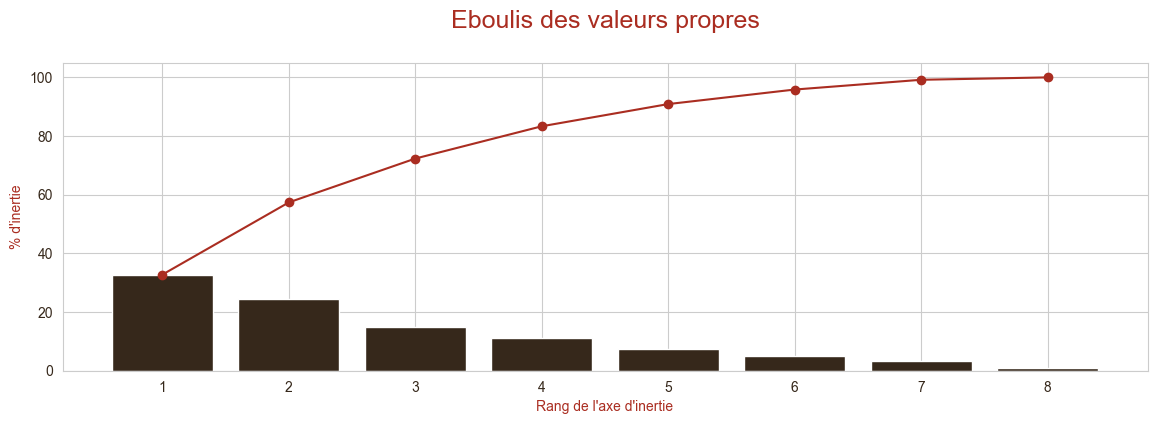

In [54]:
#Eboulis des valeurs propres
plt.figure(figsize=(14,4))
display_scree_plot(acp)

In [55]:
#Contribution des individus dans l'inertie totale
print(pd.DataFrame({'Ratio':acp.explained_variance_ratio_*100,'Composante Principale':col_nutri.columns}))
#62,19% de l'information disponible se trouve dans le 1er plan Ffactoriel
#19,07% de l'information disponible dans le 2nd plan factoriel.

       Ratio Composante Principale
0  32.776904      energy_100g (kJ)
1  24.617181              fat_100g
2  14.938170    saturated-fat_100g
3  11.005652    carbohydrates_100g
4   7.567587           sugars_100g
5   4.950755            fiber_100g
6   3.326074         proteins_100g
7   0.817676             salt_100g


## Représentation des individus - 1er plan factoriel

In [56]:
scree = acp.explained_variance_ratio_*100

In [57]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=df_food["pnns_groups_1"].nunique(),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.14433057350979375, 0.22308594352214572, 0.1971332681457356),
 (0.15344448400236532, 0.29461709099175426, 0.24987911413062608),
 (0.16255839449493692, 0.3661482384613628, 0.30262496011551654),
 (0.1716723049875085, 0.43767938593097133, 0.35537080610040706),
 (0.1807862154800801, 0.50921053340058, 0.4081166520852975),
 (0.18990012597265166, 0.5807416808701885, 0.46086249807018803),
 (0.19901403646522325, 0.652272828339797, 0.5136083440550785),
 (0.20784313725490197, 0.7215686274509804, 0.5647058823529412)]

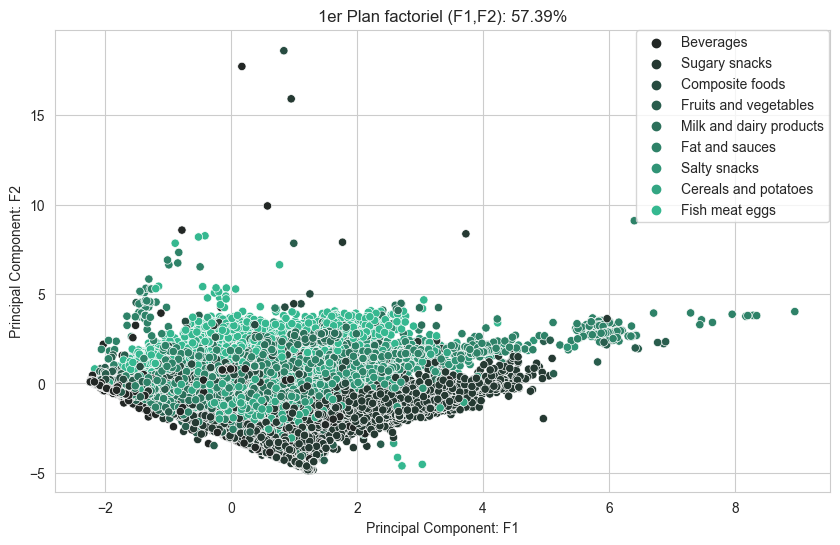

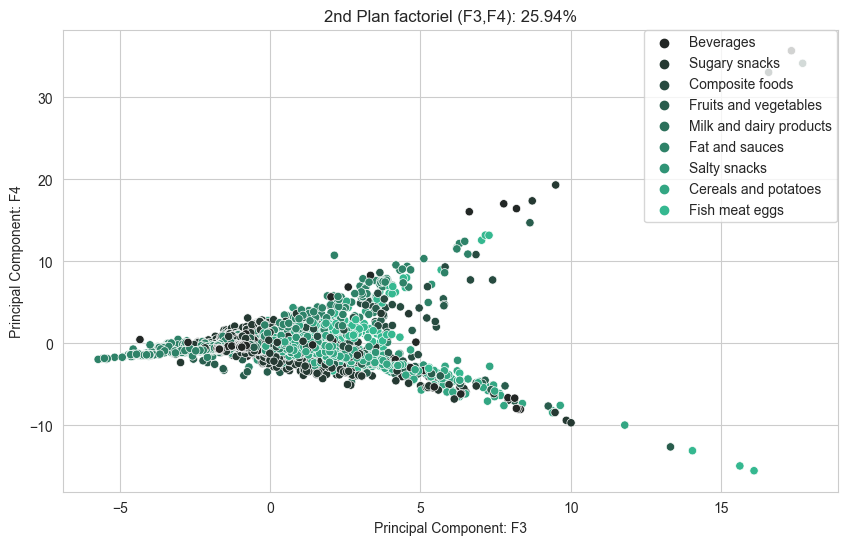

In [58]:
# Plot first two principal components
plt.figure(figsize=(10, 6))
#plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
sns.scatterplot(x=coord[:, 0], y=coord[:, 1], hue=df_food["pnns_groups_1"].values, palette=palette_map)
plt.xlabel('Principal Component: F1')
plt.ylabel('Principal Component: F2')
plt.title("1er Plan factoriel (F1,F2): {:.2f}%".format(scree[0:2].sum()))
# Place legend on the right side
plt.legend(bbox_to_anchor=(0.75, 1), loc='upper left', borderaxespad=0)
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 6))
#plt.scatter(principal_components[:, 2], principal_components[:, 3], alpha=0.5)
sns.scatterplot(x=coord[:, 2], y=coord[:, 3], hue=df_food["pnns_groups_1"].values, palette=palette_map)
plt.xlabel('Principal Component: F3')
plt.ylabel('Principal Component: F4')
plt.title("2nd Plan factoriel (F3,F4): {:.2f}%".format(scree[2:4].sum()))
plt.legend(bbox_to_anchor=(0.75, 1), loc='upper left', borderaxespad=0)
plt.show()

In [59]:
#Contribution des individus dans l'inertie totale
print("Les 2er plans factoriels expliquent {:.2f}% des données nutrionnelles".format(scree[0:4].sum()))

Les 2er plans factoriels expliquent 83.34% des données nutrionnelles


In [60]:
#Contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1) #Calcul des carrés des distances à l'origine des individus
print(pd.DataFrame({'Pays':df_food['pnns_groups_1'],'Distance des individus (de l\'origine)':np.round(di,2)}).sort_values(by='Distance des individus (de l\'origine)', ascending=False))

                  Pays  Distance des individus (de l'origine)
452          Beverages                                2521.03
19895  Composite foods                                2374.28
384      Sugary snacks                                2194.28
34037   Fish meat eggs                                 725.21
22210    Sugary snacks                                 724.83
...                ...                                    ...
19980  Composite foods                                   0.20
35764  Composite foods                                   0.19
18800     Salty snacks                                   0.12
41485  Composite foods                                   0.12
41491  Composite foods                                   0.08

[42451 rows x 2 columns]


In [61]:
# Component loadings
component_loadings = acp.components_

# Create a DataFrame for component loadings
loadings_df = pd.DataFrame(
    data=component_loadings,
    columns=col_nutri.columns,
    index=[f'PC{i+1}' for i in range(len(component_loadings))]
)
#print("Component Loadings:")
loadings_df

,energy_100g (kJ),fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
PC1,0.586316,0.510224,0.472414,0.265524,0.222023,0.174421,0.145826,0.035281
PC2,-0.049205,0.267103,0.226838,-0.526462,-0.523732,-0.171215,0.400863,0.365124
PC3,0.037474,-0.221477,-0.321592,0.276244,-0.105428,0.619092,0.496097,0.359597
PC4,0.033849,-0.100973,-0.089306,0.225112,0.367659,-0.549352,0.024137,0.701758
PC5,-0.047201,0.152061,0.052577,-0.140851,-0.105012,0.424790,-0.722500,0.488432
PC6,-0.359353,-0.151076,0.377996,-0.420554,0.641628,0.272028,0.200641,0.048499
PC7,-0.151970,-0.496179,0.684239,0.386153,-0.327330,-0.027350,-0.053961,0.051080
PC8,0.704844,-0.562974,-0.011986,-0.423710,0.016216,-0.002337,-0.078578,0.011769


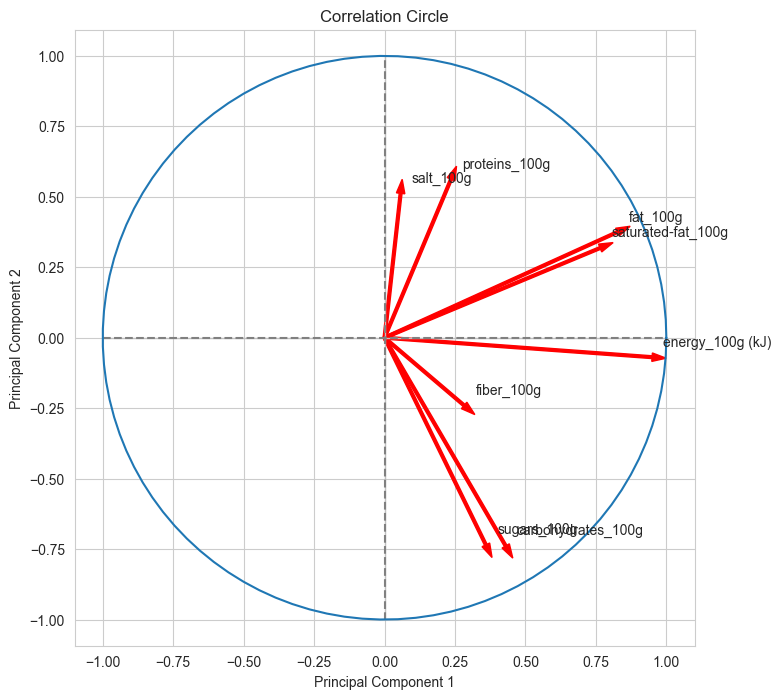

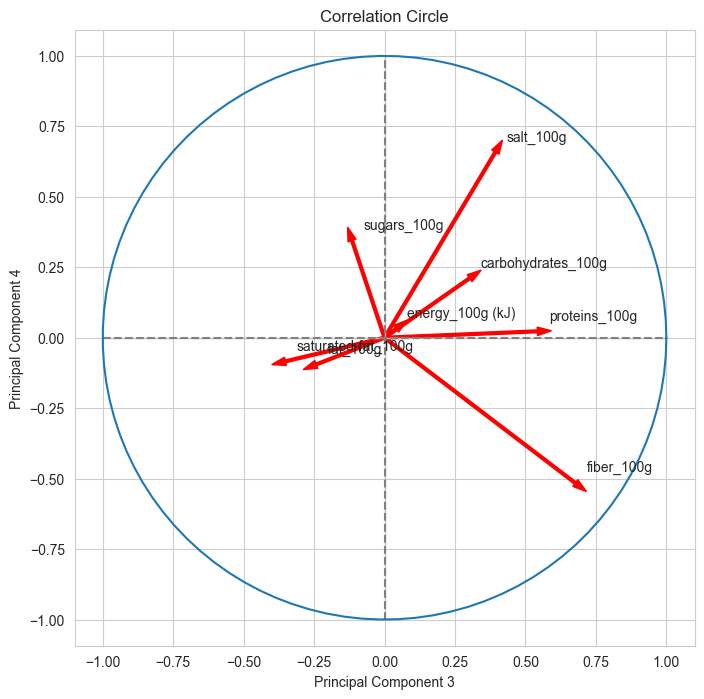

In [62]:
import matplotlib.pyplot as plt

def plot_correlation_circle(corvar, p, component1, component2):
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    
    # Affichage des étiquettes (noms des variables)
    for j in range(p):
        plt.annotate(col_nutri.columns[j], (corvar[j,component1]+0.04, corvar[j,component2]+0.04))
        plt.arrow(0, 0, corvar[j,component1], corvar[j,component2], head_width=0.03, head_length=0.05, width=0.01, fc='red', ec='red')

    # Ajout des axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)


    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'Principal Component {component1+1}')
    plt.ylabel(f'Principal Component {component2+1}')
    plt.title('Correlation Circle')

    # Ajout d'un cercle unité pour l'échelle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show(block=False)

# Cercle des corrélations pour les composantes 1 et 2
plot_correlation_circle(corvar, p, 0, 1)

# Cercle des corrélations pour les composantes 3 et 4
plot_correlation_circle(corvar, p, 2, 3)


Afficher cercle des corrélation pour F3 et F4
Bien mettre en couleur les pnns_groups_1 (le rajouter au data)
Groups PNNS et Nutriments - Faire test statistique adapté avec hypothèse H0
Travailler et chercher support pour l'interprétation du cercle des corrélations

Faire nuage de point pour nutriscore